In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
%matplotlib inline

In [112]:
data = pd.read_csv("https://github.com/hilaler/process-mining-on-sepsis-cases-event-log/blob/main/Sepsis%20Cases%20-%20Event%20Log.csv?raw=true")
data = pd.DataFrame(data)

In [136]:
print('Number of event= %d' % (data.shape[0]))
print('number of cases: ',data[data.Activity == 'ER Registration'].shape[0])

Number of event= 15214
number of cases:  1050


In [114]:
data.describe()

,Variant index,Age,Leucocytes,CRP,LacticAcid
count,15214.000000,1050.000000,3361.00000,3123.000000,1454.000000
mean,399.948863,70.080952,12.94936,113.745757,1.949106
std,256.580963,17.356744,14.99533,86.775355,1.478633
min,1.000000,20.000000,0.20000,5.000000,0.200000
25%,174.000000,60.000000,7.70000,43.000000,1.100000
50%,393.000000,75.000000,11.00000,95.000000,1.600000
75%,622.000000,85.000000,15.00000,162.000000,2.300000
max,846.000000,90.000000,381.30000,573.000000,14.900000


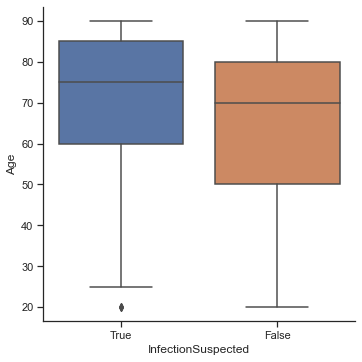

In [115]:
sns.set_theme(style="ticks")
hist = sns.catplot(x='InfectionSuspected',y='Age', kind='box', data=data)

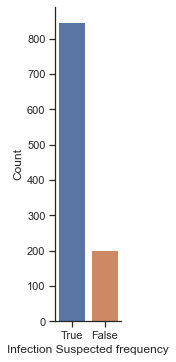

In [116]:
hist = sns.catplot(x='InfectionSuspected', kind='count', data=data, aspect=5/15)
hist.set(xlabel="Infection Suspected frequency", ylabel = "Count")

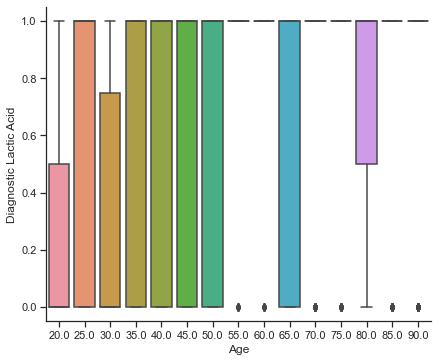

In [117]:
box = sns.catplot(x = "Age",y="DiagnosticLacticAcid",kind='box',data=data, aspect=10/8.27)
box.set(xlabel="Age", ylabel = "Diagnostic Lactic Acid")

In [118]:
dateTime = data['Complete Timestamp'].str.split(" ", n = 1, expand = True) 
date = dateTime[0]
time = dateTime[1]
data['Date'] = date
data['Time'] = time
day_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data['Day'] = pd.to_datetime(data['Date']).dt.dayofweek.apply(lambda x: day_name[x])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15214 entries, 0 to 15213
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Case ID                    15190 non-null  object 
 1   Activity                   15214 non-null  object 
 2   Complete Timestamp         15214 non-null  object 
 3   Variant                    15214 non-null  object 
 4   Variant index              15214 non-null  int64  
 5   lifecycle:transition       15214 non-null  object 
 6   org:group                  15214 non-null  object 
 7   InfectionSuspected         1050 non-null   object 
 8   DiagnosticBlood            1050 non-null   object 
 9   DisfuncOrg                 1050 non-null   object 
 10  SIRSCritTachypnea          1050 non-null   object 
 11  Hypotensie                 1050 non-null   object 
 12  SIRSCritHeartRate          1050 non-null   object 
 13  Infusion                   1050 non-null   obj

In [119]:
data

,Case ID,Activity,Complete Timestamp,Variant,Variant index,lifecycle:transition,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,...,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid,Date,Time,Day
0,A,ER Registration,2014-10-22 16:15:41.000,Variant 63,63,complete,A,True,True,True,...,A,False,True,True,NaN,NaN,NaN,2014-10-22,16:15:41.000,Wed
1,A,Leucocytes,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.6,NaN,NaN,2014-10-22,16:27:00.000,Wed
2,A,CRP,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.0,NaN,2014-10-22,16:27:00.000,Wed
3,A,LacticAcid,2014-10-22 16:27:00.000,Variant 63,63,complete,B,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.2,2014-10-22,16:27:00.000,Wed
4,A,ER Triage,2014-10-22 16:33:37.000,Variant 63,63,complete,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-22,16:33:37.000,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15209,KNA,CRP,2014-12-16 13:00:00.000,Variant 846,846,complete,B,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,66.0,NaN,2014-12-16,13:00:00.000,Tue
15210,KNA,Release A,2014-12-16 23:00:00.000,Variant 846,846,complete,E,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-16,23:00:00.000,Tue
15211,LNA,ER Registration,2014-12-03 16:50:28.000,Variant 1,1,complete,L,False,False,False,...,NaN,False,False,False,NaN,NaN,NaN,2014-12-03,16:50:28.000,Wed
15212,LNA,ER Triage,2014-12-03 16:54:19.000,Variant 1,1,complete,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-03,16:54:19.000,Wed


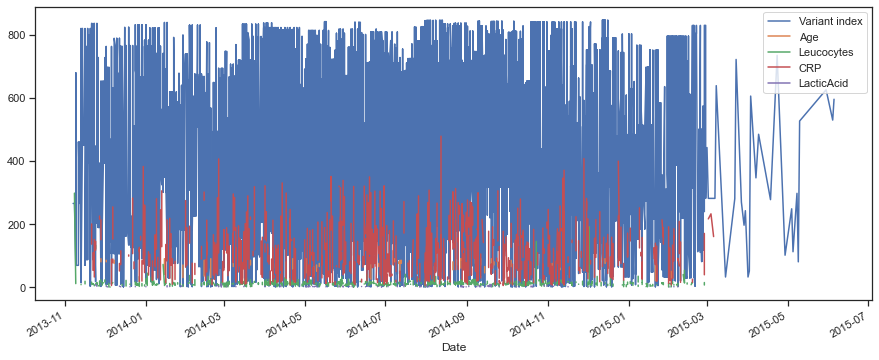

In [120]:
data['Date'] = pd.to_datetime(data['Date'])
data.index = data['Date']
del data['Date']
data.plot(figsize=(15, 6))
plt.show()

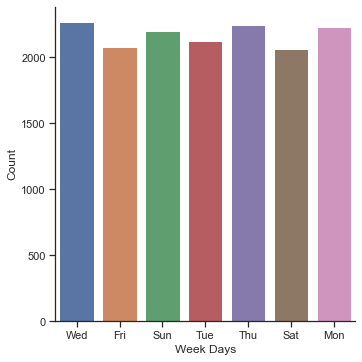

In [121]:
box = sns.catplot(x = "Day",kind='count',data=data)
box.set(xlabel="Week Days", ylabel = "Count")

In [122]:
print(data['Activity'].value_counts())

Leucocytes          3383
CRP                 3262
LacticAcid          1466
Admission NC        1182
ER Triage           1053
ER Registration     1050
ER Sepsis Triage    1049
IV Antibiotics       823
IV Liquid            753
Release A            671
Return ER            294
Admission IC         117
Release B             56
Release C             25
Release D             24
Release E              6
Name: Activity, dtype: int64


In [123]:
data = data.drop(data.columns[4], axis=1)
data = data.drop(data.columns[4], axis=1)
data.head()

,Case ID,Activity,Complete Timestamp,Variant,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,...,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid,Time,Day
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-22,A,ER Registration,2014-10-22 16:15:41.000,Variant 63,A,True,True,True,True,True,...,True,A,False,True,True,NaN,NaN,NaN,16:15:41.000,Wed
2014-10-22,A,Leucocytes,2014-10-22 16:27:00.000,Variant 63,B,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN,16:27:00.000,Wed
2014-10-22,A,CRP,2014-10-22 16:27:00.000,Variant 63,B,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,16:27:00.000,Wed
2014-10-22,A,LacticAcid,2014-10-22 16:27:00.000,Variant 63,B,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,16:27:00.000,Wed
2014-10-22,A,ER Triage,2014-10-22 16:33:37.000,Variant 63,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16:33:37.000,Wed


In [124]:
# data_rank = data.groupby(['Variant'])

In [125]:
# list(data_rank)

In [126]:
# data_rank.agg(['mean'])

In [127]:
data.to_csv('sepsisNew.csv', index=False, header=True)